# Midterm Project in Deep Learning : Exoplanet detection

Maxence Bernadou - 2024T0014 

Valerian Lemoine - 2024T0016 

Louis Miralles - 2024T0017 

Lou-Ann Salazar - 2024T0018

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


Observational data : We will be dealing with the Kepler Space Telescope Data

In [2]:
# import data
train = pd.read_csv('exoTrain.csv')
test = pd.read_csv('exoTest.csv')
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [3]:
print(train.shape)
print(test.shape)

(5087, 3198)
(570, 3198)


There are total of 5087 stars in this data.

For each star, we have 3197 flux values at different time intervals.

These flux values are used to plot the light curves we saw earlier to detect if a star has exoplanet(s) orbiting it.

Checking for missing values

In [4]:
train[train.isnull().any(axis = 1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


There are no missing values

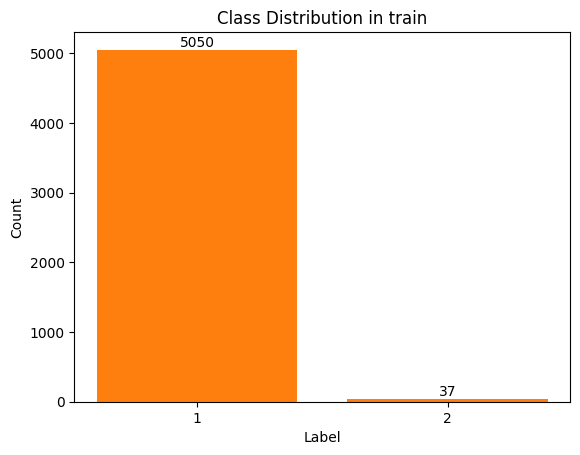

In [5]:
sns.countplot(data=train, x='LABEL')
plt.xlabel('Label')
plt.ylabel('Count')
plt.bar_label(container=plt.bar(x=[0, 1], height=train['LABEL'].value_counts().values))
plt.title('Class Distribution in train')
plt.show()


There are total of two classes.
We encounter our first problem, here the number of Class 2 is much lower than Class 1. This means that among all the stars observed, there is only a very small quantity of them that has exoplanets. This will complicate the performance of our model, it will be bad at generalization due to lack of data and introduction of representation bias.

In [6]:
# Extract labels

train = train.replace({'LABEL' : {1:0, 2:1}})
test = test.replace({'LABEL' : {1:0, 2:1}})


In [7]:
# Check the labels :
uniq_val = train.LABEL.unique()
print(f"There are {len(uniq_val)} classes in the data:")
print(f"{uniq_val[0]} - Stars with at least one Exoplanet\n{uniq_val[1]} - Stars without Exoplanets")


There are 2 classes in the data:
1 - Stars with at least one Exoplanet
0 - Stars without Exoplanets


Visualisation of light curves

In [8]:
# Drop label column to plot only the flux values
plot_df = train.drop(['LABEL'], axis=1)

# X - axis data: Replace FLUX. from each column names
col_names = list(plot_df.columns)
time = [int(flux_prefix.replace("FLUX.", "")) for flux_prefix in col_names]

# Function to plot flux variation of star
def flux_plot(df, candidate, exo = True):
    color = 'g' if exo == True else 'r'
    plt.figure(figsize=(15, 5))
    plt.plot(time, df.iloc[candidate-1], linewidth = .5, color = color)
    title1, clr1 = f"Flux Variation of 'star {candidate}' with Exoplanents", 'g'
    title2, clr2 = f"Flux Variation of 'star {candidate}' without Exoplanets", 'r'
    plt.title(title1, color = clr1) if exo == True else plt.title(title2, color = clr2)
    plt.xlabel("Time")
    plt.ylabel("Flux Variation")

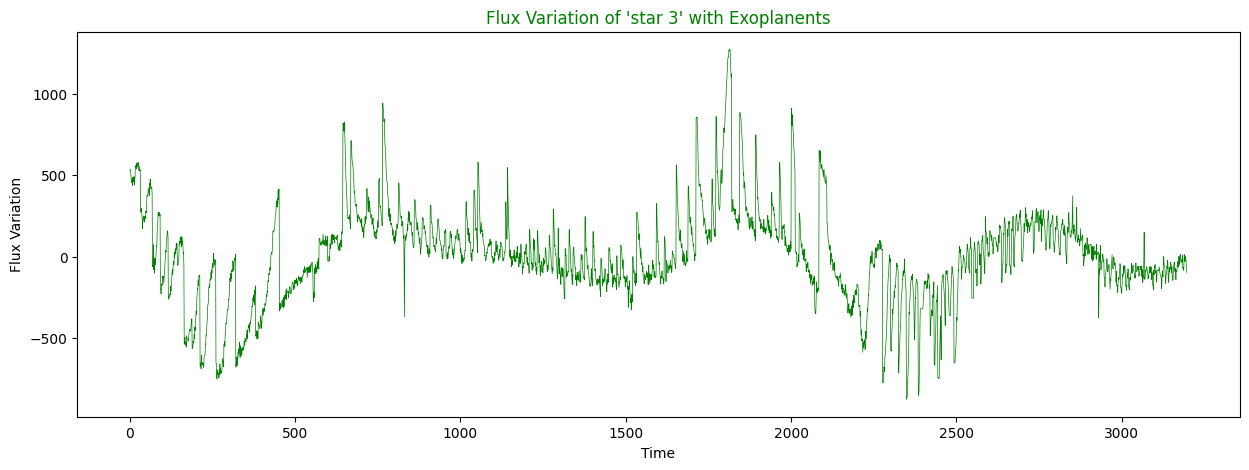

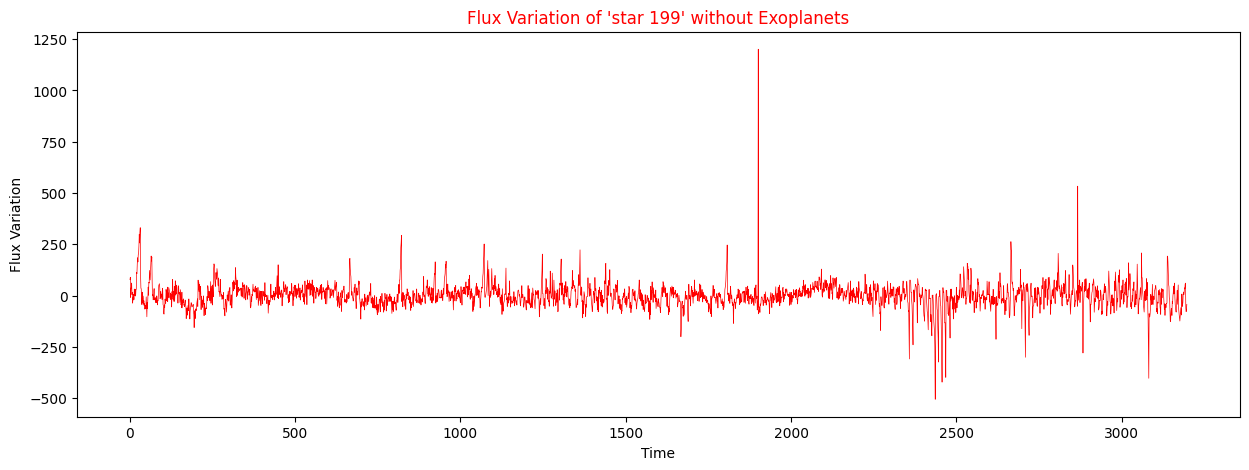

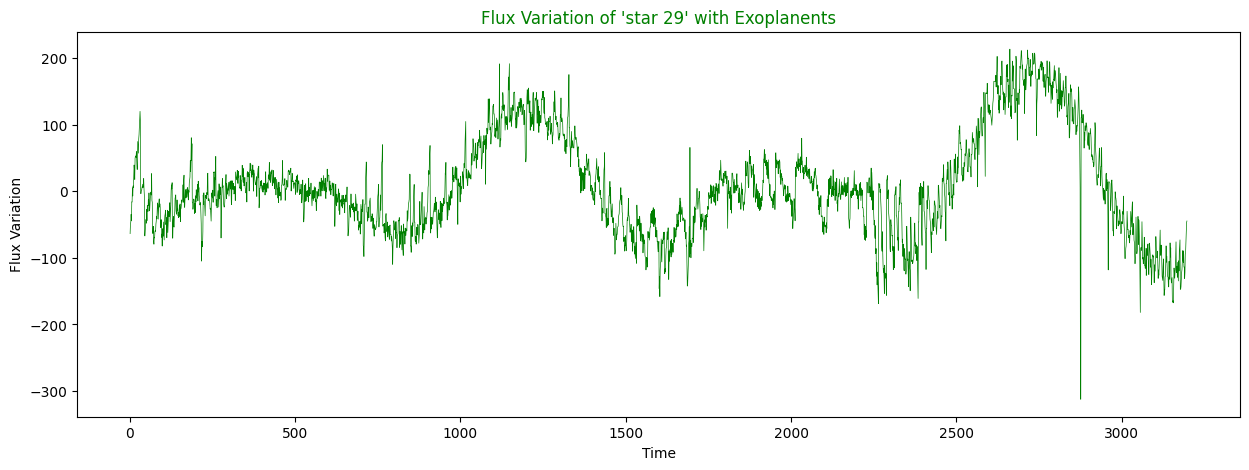

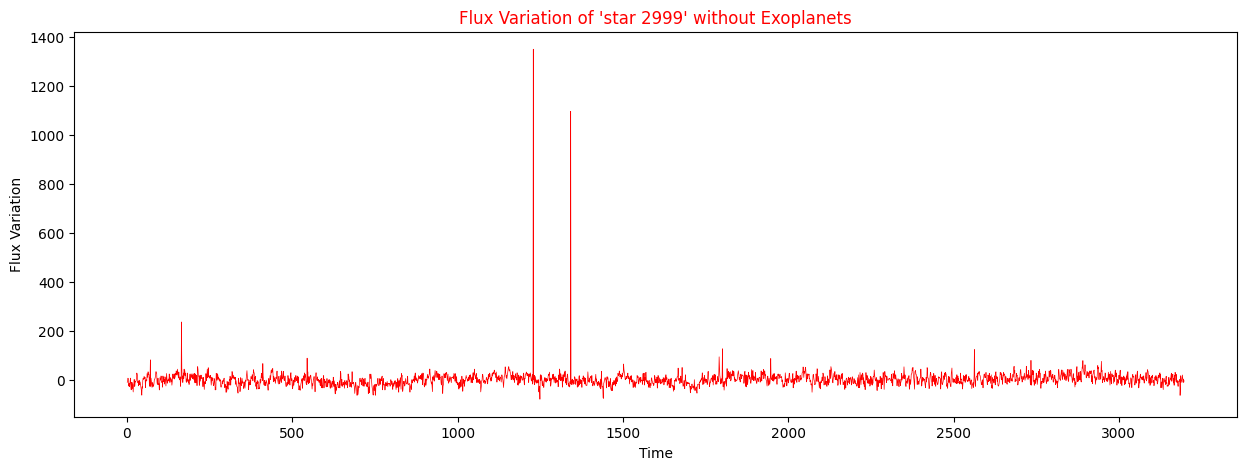

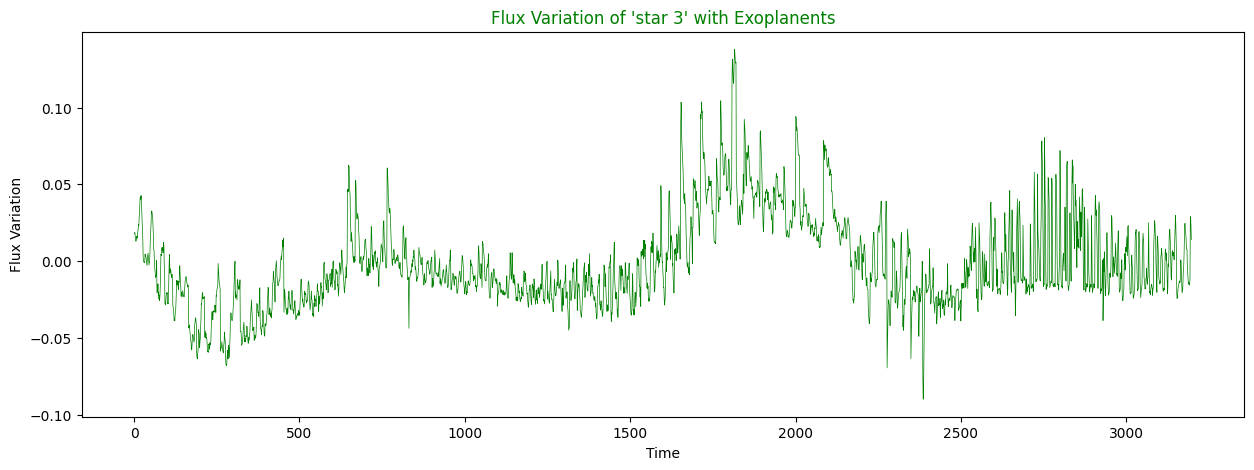

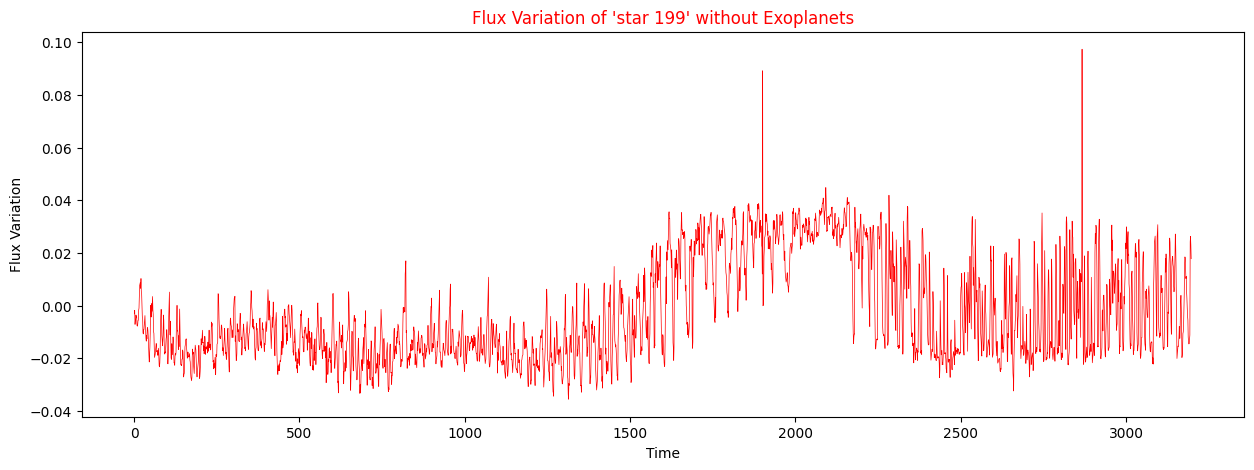

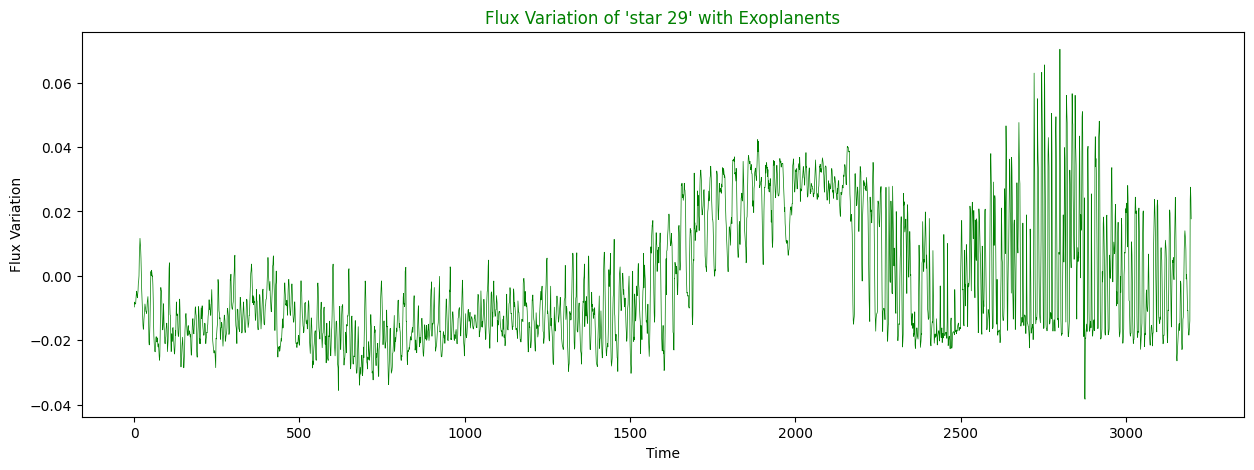

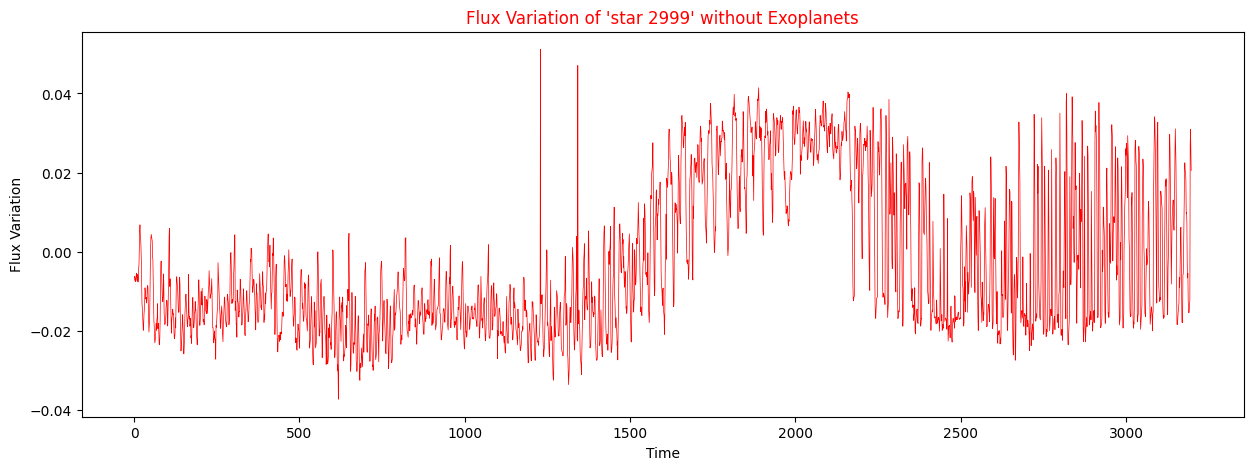

In [9]:
# Example of light curves
exo, n_exo = [3, 29], [199, 2999]

for candidate in range(len(exo)):
    flux_plot(plot_df, exo[candidate], exo = True)
    flux_plot(plot_df, n_exo[candidate], exo = False)
    
scale = StandardScaler()
# Fit the scaler to the features and transform
scaled_data = scale.fit_transform(plot_df)

# Convert the numpy array to a pandas DataFrame
plot_sdf = pd.DataFrame(scaled_data, columns=plot_df.columns)

# Use iloc on the DataFrame
for candidate in range(len(exo)):
    flux_plot(plot_sdf, exo[candidate], exo=True)
    flux_plot(plot_sdf, n_exo[candidate], exo=False)

We can conclude that the periodic drop in brightness is the factor in detecting exoplanets while in stars where the presence of exoplanets is not detected we notice some noise and random huge spikes that can be considered as extreme outliers.
KNN can be sensitive to outliers so we need to fix that.

The study on data and its FLUX values led us to conclude that the scaled data are less efficient than the raw data. Here, scaling affects slight differences observed on plots between FLUX values of stars with exoplanets and without them.


Extreme outliers

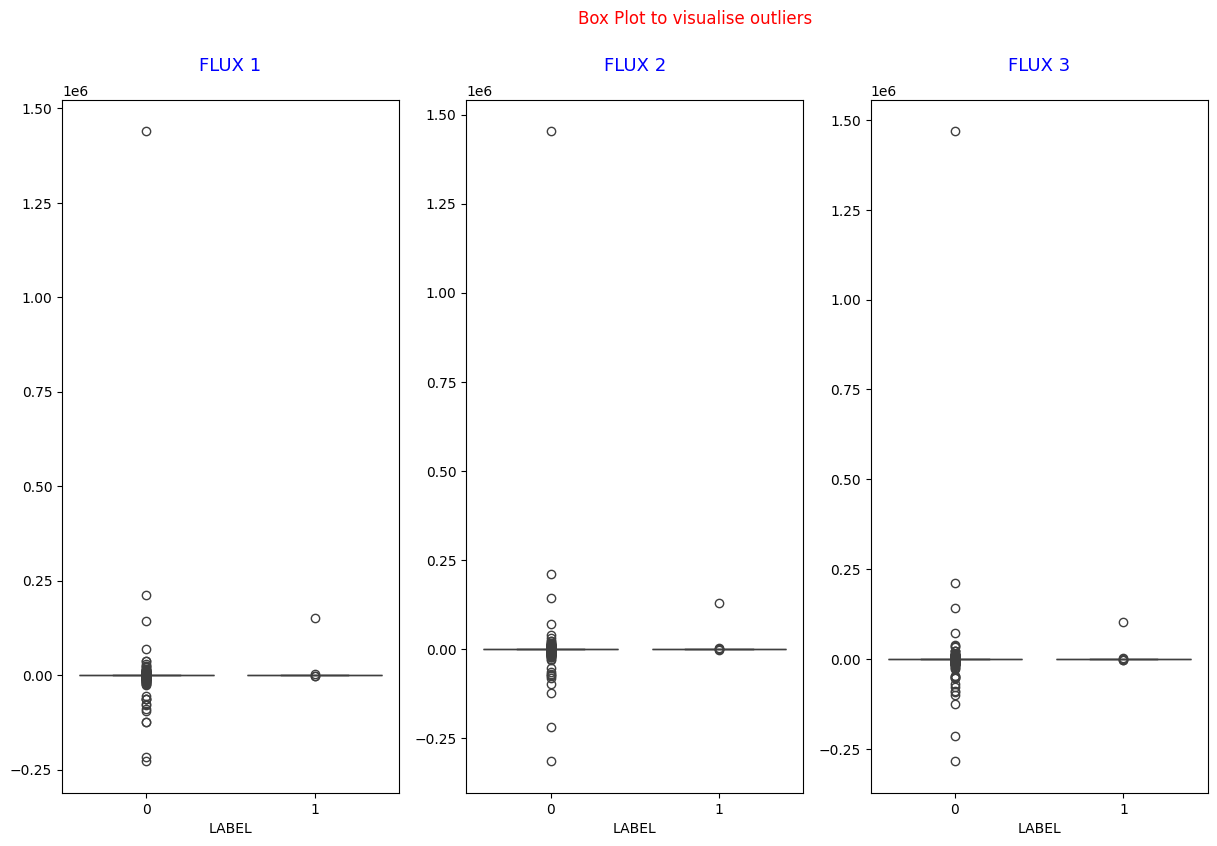

In [10]:
# Boxplot to visualise outliers
plt.figure(figsize = (20, 9))
plt.suptitle("Box Plot to visualise outliers", ha = 'right', color = 'red')
for i in range(1, 4):
    plt.subplot(1, 4, i)
    sns.boxplot(data=train, x='LABEL', y = 'FLUX.' + str(i))
    plt.ylabel("")
    plt.title("FLUX " + str(i) + "\n", color = 'b', fontsize = 13)

We can see that values ​​greater than 0.25 x 10^6 are extreme outliers

In [11]:
def handle_outliers(dataset, num_iterations):
    
    #threshold = None
    dataset_handled = dataset

    for n in range(num_iterations):
        #for column in range(dataset_handled.shape[0]):
        for index, row in dataset_handled.iterrows():
            row_values = row.values
            row_max, row_min = row_values.max(), row_values.min()
            row_maxidx, row_minidx = row_values.argmax(), row_values.argmin()
            row_mean = row_values.mean()

            #if np.abs(column_max/column_mean) >= threshold:
            dataset_handled.iloc[index][row_maxidx] = row_mean

            #if np.abs(column_min/column_mean) >= threshold:
            dataset_handled.iloc[index][row_minidx] = row_mean

    return dataset_handled

/var/folders/vg/625z9r6d00ncyf2rz1m1_90w0000gn/T/ipykernel_2831/898941330.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_handled.iloc[index][row_maxidx] = row_mean
/var/folders/vg/625z9r6d00ncyf2rz1m1_90w0000gn/T/ipykernel_2831/898941330.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_handled.iloc[index][row_minidx] = row_mean


<Axes: xlabel='LABEL', ylabel='FLUX.962'>

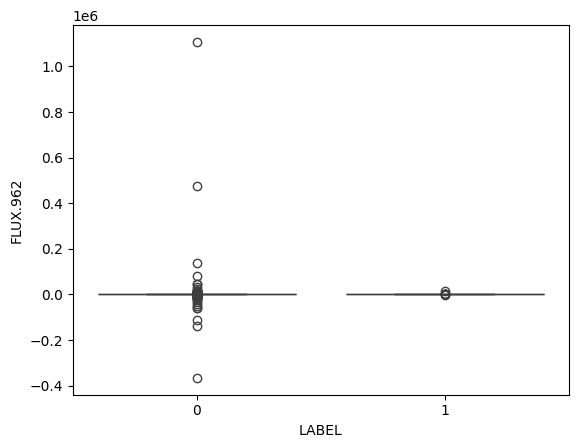

In [12]:

# Cross check via any random box plot
handled_dataset = handle_outliers(train, 2)
sns.boxplot(data=handled_dataset, x='LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

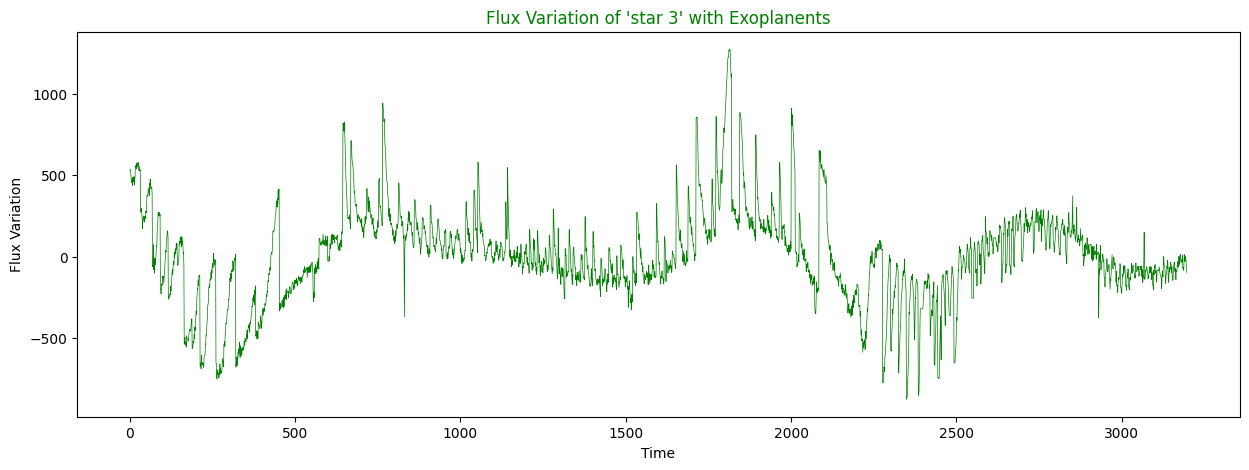

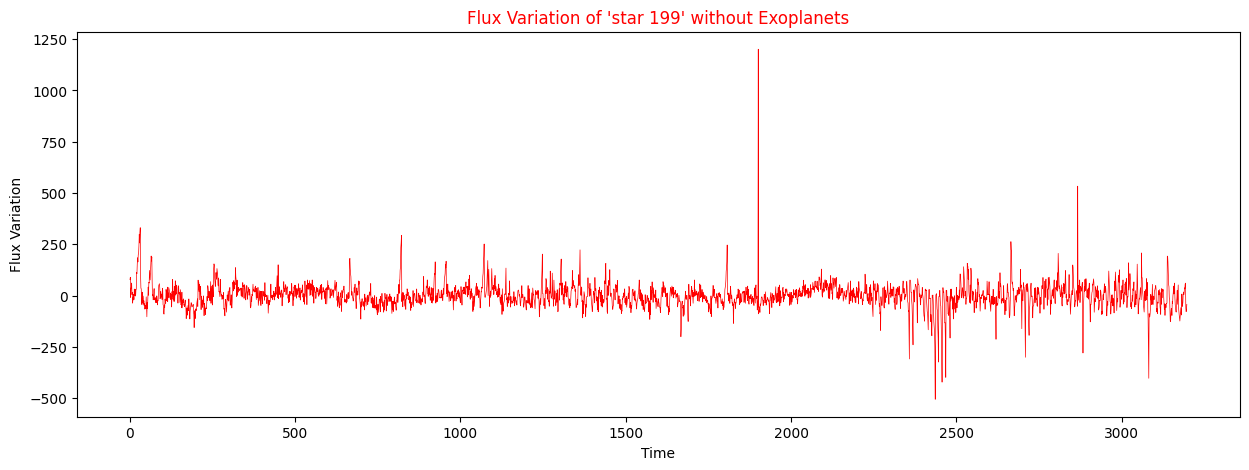

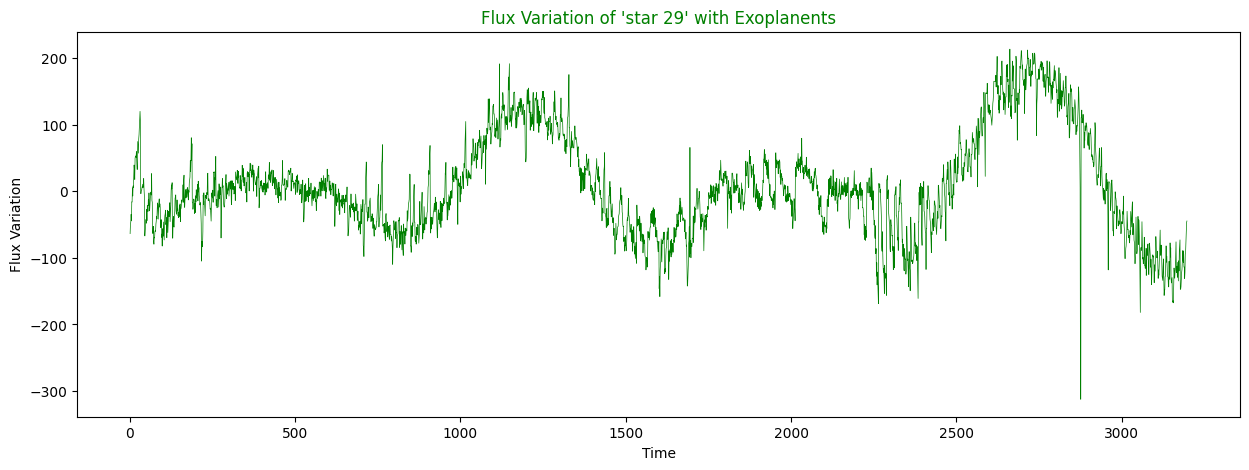

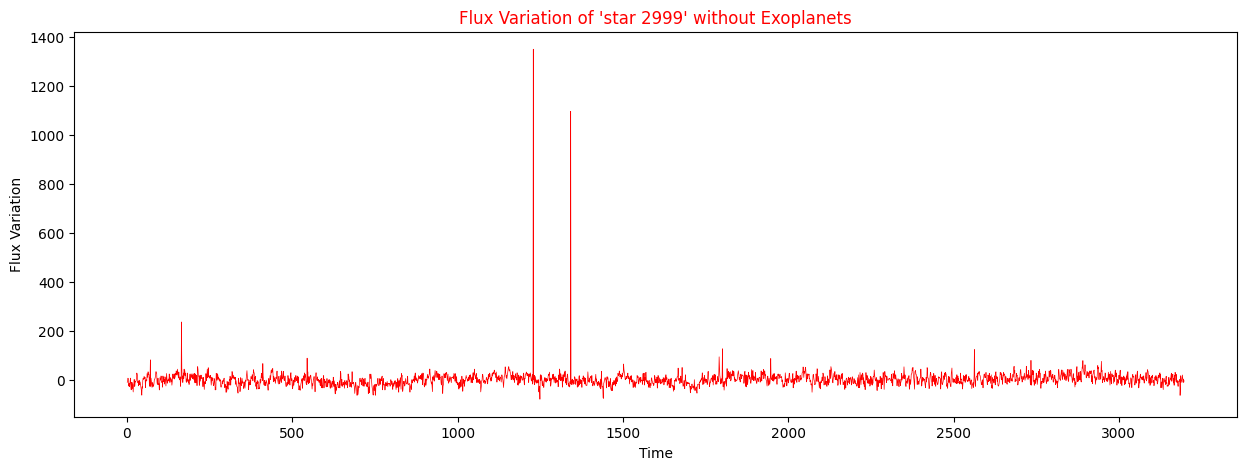

In [13]:
# Visualise the data after removing outliers

plot_df = train.drop(['LABEL'], axis=1)

exo, n_exo = [3, 29], [199, 2999]

for candidate in range(len(exo)):
    flux_plot(plot_df, exo[candidate], exo = True)
    flux_plot(plot_df, n_exo[candidate], exo = False)

Deep Learning

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def smote(x_train, y_train):
    #smote = SMOTE(random_state=17, sampling_strategy='minority')
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.3)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    x_train_res, y_train_res = pipeline.fit_resample(x_train, y_train)

    return x_train_res, y_train_res

In [15]:
def datasets():
    x_train, y_train =  train.drop(['LABEL'], axis =1), train.LABEL
    x_test, y_test = test.drop(['LABEL'], axis =1), test.LABEL
    
    #fill NaNs with mean (no NaNs)
    #for column in x_train:
        #x_train[column] = x_train[column].fillna(round(x_train[column].mean(), 2))

    #x_train, x_test = scale(x_train, x_test)
    x_train = handle_outliers(x_train, 2)
    x_train, y_train = smote(x_train, y_train)
    #y_train, y_test = lable_change(y_train, y_test)

    n_features = x_train.shape[1]

    return x_train, y_train, x_test, y_test, n_features

In [16]:
# Graph train and test accuracy
def graph_acc(history):
    # Plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    # Plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
def conf_matrix(y_test, y_pred):

    matrix = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(matrix, columns=[0, 1], index = [0, 1])
    df_cm.index.name = 'Truth'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cm, cmap="BuGn", annot=True, annot_kws={"size": 16})
    plt.show()
    
    return matrix

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_pr_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


In [19]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Print prediction metrics
def prediction_metrics(y_test, y_pred, y_class_pred, matrix):
    FP = matrix[0][1] 
    FN = matrix[1][0]
    TP = matrix[1][1]
    TN = matrix[0][0]

    sens = TP/(TP+FN)
    spec = TN/(TN+FP) 
    g_mean = np.sqrt(sens * spec)

    accuracy = accuracy_score(y_test, y_class_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_class_pred)
    precision = precision_score(y_test, y_class_pred)
    recall = recall_score(y_test, y_class_pred)
    f1 = f1_score(y_test, y_class_pred)
    auc = roc_auc_score(y_test, y_pred)

    print('\t\t Prediction Metrics\n')
    print("Accuracy:\t", "{:0.3f}".format(accuracy))
    print("Precision:\t", "{:0.3f}".format(precision))
    print("Recall:\t\t", "{:0.3f}".format(recall))
    print("\nF1 Score:\t", "{:0.3f}".format(f1))
    print("ROC AUC:\t", "{:0.3f}".format(auc))
    print("Balanced\nAccuracy:\t", "{:0.3f}".format(balanced_accuracy))
    print("\nSensitivity:\t", "{:0.3f}".format(sens))
    print("Specificity:\t", "{:0.3f}".format(spec))
    print("Geometric Mean:\t", "{:0.3f}".format(g_mean))

In [20]:

from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay


def cnn_model():

    # Data preparation
    x_train, y_train, x_test, y_test, n_features = datasets()
    x_train, y_train = shuffle(x_train, y_train) # shuffle the data to avoid stagnant 0.0000e+00 val_accuracy

    # Architecture
    model = Sequential()
    model.add(Reshape((3197, 1), input_shape=(3197,)))
    model.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(n_features, 1), kernel_regularizer='l2'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(48, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(18, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    # Representation of architecture
    print(model.summary())

    # Compile model
    lr_schedule = ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.94)

    model.compile(optimizer = Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit model
    early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(x_train, y_train, validation_split = 0.2, batch_size=64, callbacks=[early_stop], epochs=30, verbose=2)

    # Evaluate the model
    _, train_acc = model.evaluate(x_train, y_train, verbose=2)
    _, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    # Prediction
    y_class_pred = (model.predict(x_test) > 0.5).astype("int32")
    y_pred = model.predict(x_test)

    # Accuracy graph
    graph_acc(history)
    
    # Roc curve
    plot_roc_pr_curve(y_test, y_class_pred)

    # Confustion matrix
    matrix = conf_matrix(y_test, y_class_pred)
    
    # Saving the model
    model.save('cnn_model.keras')
    

2024-12-15 16:05:18.779672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/sdc/miniconda3/lib/python3.9/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/sdc/miniconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 3197, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 3196, 10)       │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1598, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1598, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15980)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │       767,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           882 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 768,019 (2.93 MB)

 Trainable params: 768,019 (2.93 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
55/55 - 7s - 122ms/step - accuracy: 0.7143 - loss: 305.3513 - val_accuracy: 0.8105 - val_loss: 12.9296
Epoch 2/30
55/55 - 3s - 62ms/step - accuracy: 0.8411 - loss: 130.1080 - val_accuracy: 0.8687 - val_loss: 33.2569
Epoch 3/30
55/55 - 5s - 86ms/step - accuracy: 0.7803 - loss: 51.7492 - val_accuracy: 0.5811 - val_loss: 0.5854
Epoch 4/30
55/55 - 5s - 93ms/step - accuracy: 0.7706 - loss: 1.0200 - val_accuracy: 0.9212 - val_loss: 0.3322
Epoch 5/30
55/55 - 3s - 59ms/step - accuracy: 0.8783 - loss: 0.3724 - val_accuracy: 0.9384 - val_loss: 0.2419
Epoch 6/30
55/55 - 3s - 56ms/step - accuracy: 0.8940 - loss: 0.3295 - val_accuracy: 0.9555 - val_loss: 0.1781
Epoch 7/30
55/55 - 3s - 57ms/step - accuracy: 0.9046 - loss: 0.2682 - val_accuracy: 0.9578 - val_loss: 0.1446
Epoch 8/30
55/55 - 3s - 56ms/step - accuracy: 0.9034 - loss: 0.2537 - val_accuracy: 0.9566 - val_loss: 0.1320
Epoch 9/30
55/55 - 3s - 56ms/step - accuracy: 0.9049 - loss: 0.2452 - val_accuracy: 0.9612 - val_loss: 0.11

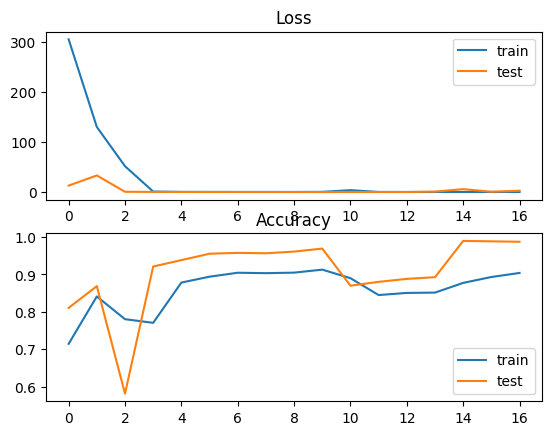

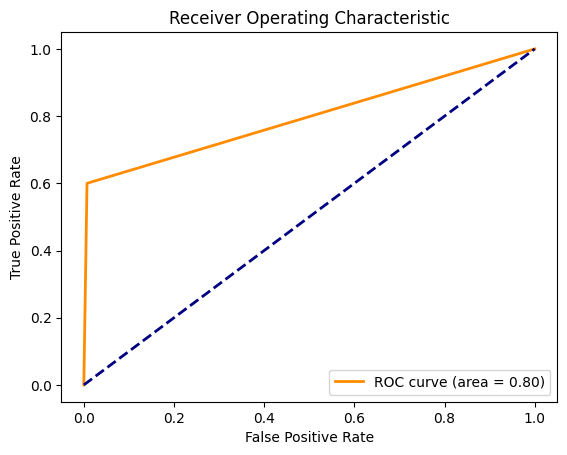

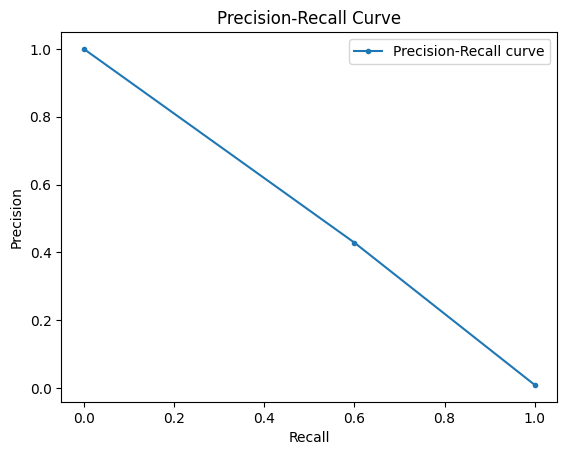

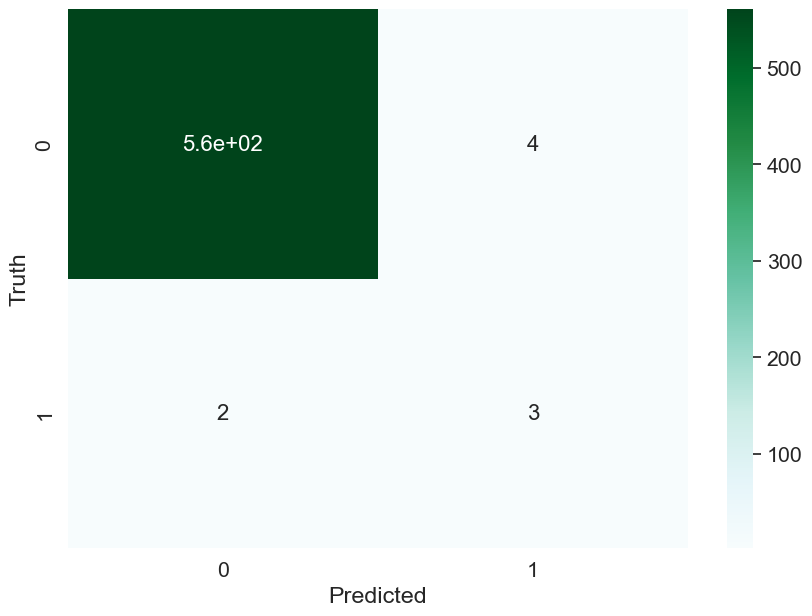

In [21]:
cnn_model()

In [2]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from io import BytesIO
from PIL import Image, ImageTk

# Charger le modèle sauvegardé au format .keras
model = load_model('cnn_model.keras')  # Remplacez par le chemin de votre fichier .keras
data = pd.read_csv('exoTrain.csv')

# Fonction pour tracer la courbe de luminosité
def plot_light_curve(star_index):
    star_data = data.iloc[star_index, 1:].values
    plt.figure(figsize=(12, 4))
    plt.plot(range(len(star_data)), star_data)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.title(f'Light Curve for Star {star_index}')
    
    # Sauvegarder l'image dans un tampon
    buffer = BytesIO()
    plt.savefig(buffer, format="png")
    buffer.seek(0)
    plt.close()  # Fermer la figure pour libérer la mémoire
    return buffer

# Fonction de prédiction
def predict_star():
    try:
        star_index = int(entry_star_index.get())
        if star_index < 0 or star_index >= len(data):
            raise ValueError("Index out of limites.")
        
        # Prédiction
        star_data = data.iloc[star_index, 1:].values.reshape(1, -1)
        prediction = (model.predict(star_data) > 0.5).astype(int)[0][0]
        result = "Exoplanet Detected" if prediction == 1 else "No Exoplanet Detected"

        # Afficher le résultat
        lbl_result.config(text=f"Prediction: {result}", fg="green")

        # Afficher la courbe de luminosité
        buffer = plot_light_curve(star_index)
        img = Image.open(buffer)
        img_tk = ImageTk.PhotoImage(img)
        lbl_image.config(image=img_tk)
        lbl_image.image = img_tk  # Sauvegarder une référence pour éviter la suppression
        buffer.close()  # Fermer le tampon après utilisation

    except ValueError as e:
        messagebox.showerror("Error", f"Wrong Input : {e}")
    except Exception as e:
        messagebox.showerror("Error", f"Error : {e}")

# Interface Tkinter
root = tk.Tk()
root.title("Exoplanet Detection")

# Widgets
frame = tk.Frame(root)
frame.pack(pady=10)

lbl_instruction = tk.Label(frame, text="Enter the index of a star (0 to N):")
lbl_instruction.grid(row=0, column=0, padx=5, pady=5)

entry_star_index = tk.Entry(frame, width=10)
entry_star_index.grid(row=0, column=1, padx=5, pady=5)

btn_predict = tk.Button(frame, text="Predict", command=predict_star)
btn_predict.grid(row=0, column=2, padx=5, pady=5)

lbl_result = tk.Label(root, text="", font=("Arial", 14))
lbl_result.pack(pady=10)

lbl_image = tk.Label(root)
lbl_image.pack(pady=10)

# Lancer l'application
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
